# Perceptron simple

Un perceptrón simple está compuesto de una capa pasiva de entrada, y una sola capa activa que también sirve de capa de salida.

El input de un perceptron determina el estado de las neuronas pasivas de la capa de entrada, $x_1,...,x_{n_e}$.
Se considera, además, una neurona pasiva de estado fijo $x_{n_e+1}=-1$, para que haga las veces de umbral de activación.
Ante una entrada $x$, la salida de la red neuronal viene dada por
$$
y_j(x)
=
g(h_{j}(x))
$$
donde
$$
h_j
=
\sum_{i=1}^{n_e+1} w_{ji}x_i
$$
para $j=1,...,n_s$, y $g$ es una función de activación.
Por ejemplo, una ReLU, la cual viene dada por
$g(h) = h$ si $h>0$ y $g(h)=0$ si $h\leq 0$.

Para entrenar la red, usamos como función costo el error cuadrático sobre el conjunto de entrenamiento $\{e_m,s_m:m=1,...,M\}$, al cuál lo expresamos como una función de $w$
$$
E(w)
=
\frac{1}{2}
\sum_{m=1}^M
\sum_{j=1}^{n_s+1}
(y_{jm}(w)-s_{mj})^2
$$
donde $s_{mj}$ es la salida deseada en la $j$-ésima neurona ante el $m$-ésimo ejemplo, $y_{mj}$ es la salida obtenida en la $j$-esima neurona ante el $m$-ésimo ejemplo, y $n_s$ es el número de neuronas de salida.
Por otro lado,
$$
y_{jm}(w)
=
g(h_{jm}(w))
$$
donde
$$
h_{jm}(w)
=
\sum_{i=0}^{n_e}
w_{ji}e_{mi}
$$
Nos interesa calcular el gradiente de $E(w)$
\begin{align*}
\frac{\partial E}{\partial w_{pq}}
&=&
\sum_{m=1}^M
\sum_{j=1}^{n_s}
(y_{jm}(w)-s_{mj})
\frac{\partial y_{jm}}{\partial w_{pq}}
\\
&=&
\sum_{m=1}^M
\sum_{j=1}^{n_s}
(y_{jm}(w)-s_{mj})
g'(h_{jm}(w))
\frac{\partial h_{jm}}{\partial w_{pq}}
\\
&=&
\sum_{m=1}^M
\sum_{j=1}^{n_s}
(y_{jm}(w)-s_{mj})
g'(h_{jm}(w))
\delta_{jp}
e_{mq}
\\
&=&
\sum_{m=1}^M
(y_{pm}(w)-s_{mp})
g'(h_{pm}(w))
e_{mq}
\end{align*}
puesto que
$$
\frac{\partial h_{jm}}{\partial w_{pq}}
=
\sum_{i=1}^{n_e+1}
\frac{w_{ji}}{w_{pq}}
e_{mi}
=
\sum_{i=1}^{n_e+1}
\delta_{jp}
\delta_{iq}
e_{mi}
=
\delta_{jp}
e_{mq}
$$
Recordar que, en el caso de una ReLU, $g'(h)=\Theta(h)$, donde $\Theta(h)=1$ si $h>0$ y $\Theta(h)=0$ si $h\leq 0$.

Para actualizar los pesos sinápticos en la $(\tau+1)$-ésima época de entrenamiento, utilice la regla
$$
w^{\tau}_{ji} \to w^{\tau+1}_{ji} = w^{\tau}_{ji} - \eta \frac{\partial E}{\partial w_{ji}}
$$
para todo $ji$.

## **Ejercicio 1**

Genere un conjunto de entrenamiento compuesto por $M$ puntos en $\mathbb{R}^{n_e}$, distribuidos en $n_s$ nubes de $m_c$ puntos.
En total, se generarán $M=\sum_c m_c$ puntos.

Para generar las nubes:

* genere aleatoriamente $n_s$ puntos en $\mathbb{R}^{n_e}$ a los que llamaremos centros, sorteando los valores de las coordenadas a partir de una distribución normal, y

* para cada centro $c$, genere $m_c$ puntos aleatorios alrededor del mismo, sumando sus coordenadas a números aleatorios generados con una Gaussiana de varianza $\sigma^2$.

Las $n_e$ coordenadas del $m$-ésimo punto constituirán el vector de entrada del $m$-ésimo ejemplo.
La nube a la que pertenece el $m$-ésimo punto determinará el vector de salida del $m$-ésimo ejemplo.
Más precisamente, si el $m$-ésimo punto pertenence a la $c$-ésima nube, el vector de salida será el vector canónico $(0,0,...,1,...,0)$ de $n_s$ componentes con un único 1 en la $c$-esima posición.

Concretamente

1. Genere un conjunto de 8 puntos en $\mathbb{R}^{n_e}$ con $n_e=2$, divididos en 3 nubes con $m_1=3$ en la primera nube, $m_2=2$ puntos en la segunda nube y $m_3=3$ puntos en la tercera nube. Utilice $\sigma=0.1$ para indicar la dispersión de los puntos alrededor de cada nube.

2. Grafique las nubes de puntos, utilizando un color distinto para cada una de ellas.

Tengo, $n_e$ = 2, $m_1$ = 3, $m_2$ = 2, $m_3$ = 3 y $\sigma$ = 0.1, $n_s$ = #cantidad de nubes = 3

Es decir, 2 neuronas de entrada, 3 neuronas de salida. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# 1.1)
def generate_samples(list_m, n_e, sigma=0.1):
    """  
    list_m: cantidad de muestras por clase (nube de puntos).
    n_experiments: cantidad de neuronas de entrada. (parametros de la red)

    la cantidad de neuronas de salida sera igual a la cantidad de elementos en list_m.
    La salida esperada para cada vector de entrenamiento, esta dado por la nube a la que pertence:
    - si corresponde a nube 1, la salida esperada sera [1, 0, 0, ..., 0]
    - si corresponde a nube 2, la salida esperada sera [0, 1, 0, ..., 0] y asi sucesivamente.
    """
    n_s = len(list_m) # numero de neuronas de salida
    centers = np.random.normal(0, 1, (n_s, n_e)) # centros de las nubes de puntos

    M = sum(list_m) # numero de muestras de entrenamiento
    training_set = np.zeros((M, n_e+1)) # conjunto de entrenamiento de entrada M x n_e
    trainning_set_output = np.zeros((M, n_s)) # conjunto de entrenamiento de salida M x n_s (cantidad de ejemplos x cantidad de neuronas de salida)
    m = 0
    for c in range(n_s): # por cada nube de puntos genero la cantidad de muestras especificadas en list_m a partir de su centro (centres[c])
        for i in range(list_m[c]):
            traning_vector = centers[c] + np.random.normal(0, sigma, n_e) # genero el vector de entrenamiento a partir del centro, sumandole un ruido gaussiano para cada coordenada
            training_set[m] = np.append(traning_vector, -1) # agrego el vector de entrenamiento generado al conjunto de entrenamiento, pero agregandole la columna -1 al final del umbral
            trainning_set_output[m] = np.zeros(n_s) # inicializo el vector de salida esperada
            trainning_set_output[m][c] = 1 # seteo la salida esperada para el vector de entrenamiento generado segun la nube a la que pertenece
            m += 1
    return training_set, trainning_set_output

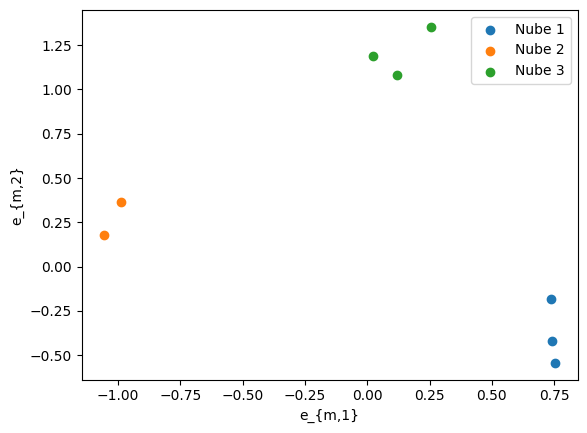

In [3]:
training_set,trainning_set_output = generate_samples([3,2,3], 2, 0.1)
# 1.2) Graficar nubes de puntos
def plot_samples(training_set, trainning_set_output):
    n_s = trainning_set_output.shape[1]
    for c in range(n_s):
        plt.scatter(training_set[trainning_set_output[:,c] == 1, 0], training_set[trainning_set_output[:,c] == 1, 1], label=f'Nube {c+1}')
    plt.xlabel('e_{m,1}')
    plt.ylabel('e_{m,2}')
    plt.legend()
    plt.show()

plot_samples(training_set, trainning_set_output)

## **Ejercicio 2**

Implemente y entrene un **perceptrón simple** sobre el conjunto de entrenamiento generado en el Ejercicio 1.
Para entrenarlo, utilice una taza $\eta=0.02$ y alrededor de 500.000 de épocas o más, según considere necesario.

Luego, grafique nuevamente los puntos, pintando el relleno de los mismos con los colores de las nubes asociadas, y el borde de los mismos con el color correspondiente a la predicción.

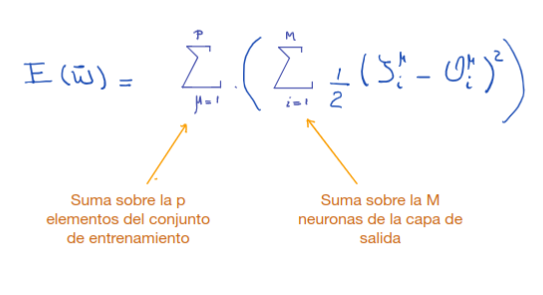

In [4]:
def calculate_ecm(training_set, trainning_set_output, w, g_sum):
    """
    Calcula el error cuadratico medio de la red neuronal para un conjunto de entrenamiento y una matriz de pesos  
    """
    ecm = 0
    for m in range(training_set.shape[0]):
        h_m = np.dot(w, training_set[m]) # calculo la suma ponderada de las entradas
        y_m = g_sum(h_m) # calculo la salida de la red
        ecm += np.sum((y_m -trainning_set_output[m])**2) # calculo el error cuadratico medio
    return 0.5 * ecm

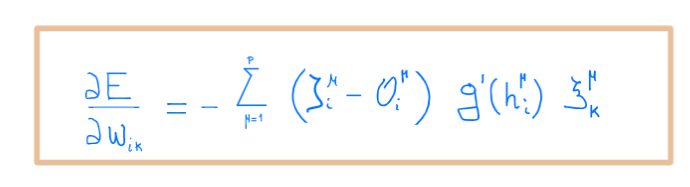
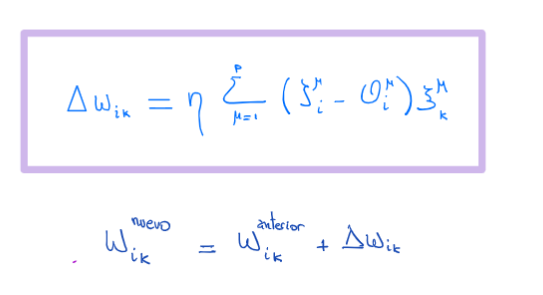

In [31]:
def train_perceptron(training_set, training_set_output, training_rate, g_function, dg_function, w=None,epochs=1000):
    """ 
        training_set: conjunto de entrenamiento de entrada
        training_set_output: datos de salida esperados para cada vector de entrenamiento
        training_rate: tasa de aprendizaje
        g_function: funcion de activacion
        dg_function: derivada de la funcion de activacion
        w: matriz de pesos de la red
        epochs: cantidad de epocas de entrenamiento

        Entrena la red neuronal con el algoritmo de aprendizaje del perceptron simple
        por medio de descenso de gradiente estocastico. (actualizacion de los pesos por cada vector de entrenamiento)
    """
    n_s = training_set_output.shape[1]
    n_e = training_set.shape[1]
    if w is None:
        w = np.random.normal(0, 1, (n_s, n_e)) # inicializo los pesos de la red

    for _ in tqdm(range(epochs)):
        for mu in range(training_set.shape[0]): # mu es el indice del vector de entrenamiento
            h_mu = np.dot(w, training_set[mu]) # salida de la red para el vector de entrenamiento indice m, tiene dimension n_s
            """ 
            Ahora dada la salida para este vector de entrenamiento, calculo el error y actualizo los pesos
            """
            # TODO: actualizar los pesos de la red
    return w

In [27]:
def eval(g_function, w, x):
    return g_function(np.dot(w, x))

In [28]:
def relu(x):
    return np.maximum(0, x)

def drelu(x):
    if x > 0:
        return 1
    return 0

In [29]:
training_set_ej2, training_set_output_ej2 = generate_samples([3,2,3], 2, 0.1)

w_ej2 = train_perceptron(training_set_ej2, training_set_output_ej2, 0.02, relu, drelu, epochs=500000)

100%|██████████| 500000/500000 [01:47<00:00, 4648.46it/s]


In [9]:
calculate_ecm(training_set_ej2, training_set_output_ej2, w_ej2, relu)

2.5323721956790943

[[9.57795992e-01 0.00000000e+00 0.00000000e+00]
 [1.00433588e+00 0.00000000e+00 0.00000000e+00]
 [1.01803284e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.96689489e-04 0.00000000e+00 0.00000000e+00]
 [8.89988837e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.21644966e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


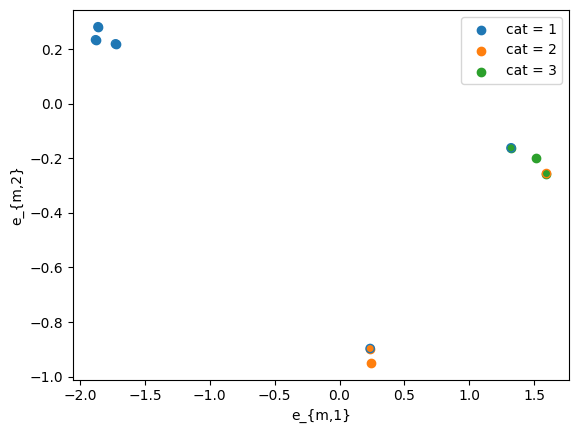

In [30]:
output = np.array([eval(relu, w_ej2, x) for x in training_set_ej2])
print(output)
colors = ['C0', 'C1', 'C2']
n_s = training_set_output_ej2.shape[1]

for c in range(n_s):
    plt.scatter(training_set_ej2[training_set_output_ej2[:,c] == 1, 0], training_set_ej2[training_set_output_ej2[:,c] == 1, 1], color=colors[c], label=f'cat = {c+1}')

for c in range(n_s):
    plt.scatter(training_set_ej2[output[:,c] > 0, 0], training_set_ej2[output[:,c] > 0, 1], facecolors='none', edgecolors=colors[c])

plt.xlabel('e_{m,1}')
plt.ylabel('e_{m,2}')
plt.legend()
plt.show()

## **Ejercicio 3**

La compuerta XOR.

El siguiente conjunto de 4 ejemplos:

* $e_1 = (0,0)$, $s_1=(1,0)$
* $e_2 = (0,1)$, $s_2=(0,1)$
* $e_3 = (1,0)$, $s_3=(0,1)$
* $e_4 = (1,1)$, $s_4=(1,0)$

corresponde a la compuerta XOR.
Utilice el **perceptrón simple** implementando para verificar que el mismo no es capáz de aprender este conjunto de ejemplos.

In [11]:
# set de datos de compuerta XOR
training_set_ej3 = np.array([[0,0,-1],
                             [0,1,-1],
                             [1,0,-1],
                             [1,1,-1]])
training_set_output_ej3 = np.array([[1,0],
                                    [0,1],
                                    [0,1],
                                    [1,0]])

w_ej3 = train_perceptron(training_set_ej3, training_set_output_ej3, 0.02, relu, drelu, epochs=500000)

100%|██████████| 500000/500000 [00:27<00:00, 18321.86it/s]


[[1.00000000e+00 1.40179675e-16]
 [2.66453526e-15 0.00000000e+00]
 [2.66453526e-15 1.00000000e+00]
 [0.00000000e+00 2.58267033e-15]]


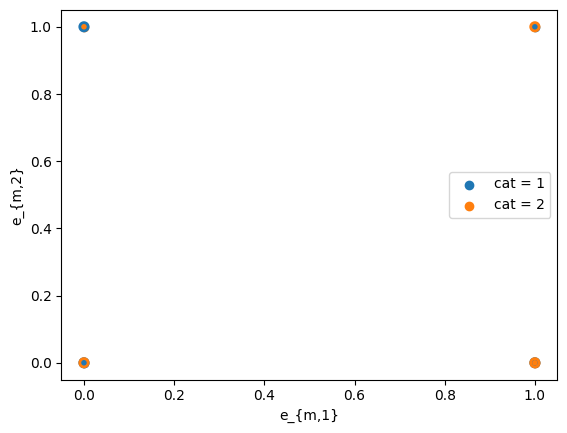

In [12]:
output = np.array([eval(relu, w_ej3, x) for x in training_set_ej3])
print(output)
colors = ['C0', 'C1']
n_s = training_set_output_ej3.shape[1]

for c in range(n_s):
    plt.scatter(training_set_ej3[training_set_output_ej3[:,c] == 1, 0], training_set_ej3[training_set_output_ej3[:,c] == 1, 1], color=colors[c], label=f'cat = {c+1}')

for c in range(n_s):
    plt.scatter(training_set_ej3[output[:,c] > 0, 0], training_set_ej3[output[:,c] > 0, 1], facecolors='none', edgecolors=colors[c], linewidths=2)

plt.xlabel('e_{m,1}')
plt.ylabel('e_{m,2}')
plt.legend()
plt.show()